## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# Task 1: XNOR

In [5]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2
print(tf.__version__)

2.7.0


##  Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 2)_, ground truth _(g1, g2) = (0, 1), h0 = 0, and (wx, wh, b1, w, b2) = (3, 1, 2, -1, 1)_, **compute _(dwx, dwh, db1, dw, db2)_**, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* Show all of your derivations and the computational process.
* Use LATEX to edit the equations (Jupyter notebook can recognize the basic LATEX syntax). Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

<span style="color:red">Solution:</span>

**[fill in here: Enter your derivations and the computational process]**


$ J = \sum_{i=1}^2 J_i $ 

$ J_i = \| y_i - g_i \|^2 $, 

$ y_2 = \sigma ( w*h_2 + b_2) $ 

$ h_2 = \sigma(w_x x_2 + w_h h_1 + b_1) $ 

$ y_1 = \sigma ( w*h_1 + b_2) $

$ h_1 = \sigma(w_x x_1 + w_h h_0 + b_1) $

$ \sigma^{'} (x) = \sigma(x) * (1 - \sigma(x)) $

$$\begin{aligned}
\frac{\partial J}{\partial w}&=\sum_{i=1}^2 \frac{1}{2} \frac{\partial J_i}{\partial w} \\ 
&=\sum_{i=1}^2  (y_i - g_i) \frac{\partial y_i}{\partial w} \\
&=\sum_{i=1}^2  (y_i - g_i) \sigma(w h_i + b_2)*[1-\sigma(w h_i + b_2)] h_i \\
&= (y_1 - 0) y_1 (1-y_1) h_1 + (y_2 - 1) y_2 (1-y_2) h_2 \\
&= -0.08512777681556812
\end{aligned}$$

$$\begin{aligned}
\frac{\partial J}{\partial b_2}&=\sum_{i=1}^2 \frac{1}{2} \frac{\partial J_i}{\partial b_2} \\ 
&=\sum_{i=1}^2  (y_i - g_i) \frac{\partial y_i}{\partial b_2} \\
&=\sum_{i=1}^2  (y_i - g_i) \sigma(w h_i + b_2)*[1-\sigma(w h_i + b_2)]  \\
&= (y_1 - 0) y_1 (1-y_1)+ (y_2 - 1) y_2 (1-y_2)\\
&= 0.023093510510468193
\end{aligned}$$

$$\begin{aligned}
\frac{\partial J}{\partial w_h}&=\sum_{i=1}^2 \frac{1}{2} \frac{\partial J_i}{\partial w_h} \\ 
&=\sum_{i=1}^2  (y_i - g_i) \frac{\partial y_i}{\partial w_h} \\
&=\sum_{i=1}^2  (y_i - g_i) \sigma(w h_i + b_2)*[1-\sigma(w h_i + b_2)] w\frac{\partial h_i}{\partial w_h}  \\
&=(y_1 - g_1) \sigma(w h_1 + b_2)*[1-\sigma(w h_1 + b_2)]*w* \sigma(w_x x_1+w_h  h_0 + b_1)*[1-\sigma(w_x x_1+w_h  h_0 + b_1)] h_0\\
&+(y_2 - g_2) \sigma(w h_2 + b_2)*[1-\sigma(w h_2 + b_2)]*w* \sigma(w_x x_2+w_h  h_1 + b_1)*[1-\sigma(w_x x_2+w_h  h_1 + b_1)] (h_1 + w_h*\frac{\partial h_1}{\partial w_h})\\
&= - 2 (y_1 - 0) y_1 (1-y_1) h_1 (1-h_1) h_0 - (y_2 - 1) y_2 (1-y_2) h_2 (1-h_2) [h_1 + w_h h_1 (1-h_1) h_0] \\
&=8.612590032788873e-06 \\
&=0
\end{aligned}$$

$$\begin{aligned}
\frac{\partial J}{\partial b_1}&=\sum_{i=1}^2 \frac{1}{2} \frac{\partial J_i}{\partial b_1} \\ 
&=\sum_{i=1}^2  (y_i - g_i) \frac{\partial y_i}{\partial b_1} \\
&=\sum_{i=1}^2  (y_i - g_i) \sigma(w h_i + b_2)*[1-\sigma(w h_i + b_2)]w \frac{\partial h_i}{\partial b_1}  \\
&=(y_1 - g_1) \sigma(w h_1 + b_2)*[1-\sigma(w h_1 + b_2)]*w* \sigma(w_x x_1+w_h  h_0 + b_1)*[1-\sigma(w_x x_1+w_h  h_0 + b_1)] \\
&+(y_2 - g_2) \sigma(w h_2 + b_2)*[1-\sigma(w h_2 + b_2)]*w* \sigma(w_x x_2+w_h  h_1 + b_1)*[1-\sigma(w_x x_2+w_h  h_1 + b_1)] (1 + w_h*\frac{\partial h_1}{\partial b_1})\\
&=-2 (y_1 - 0) y_1 (1-y_1) h_1 (1-h_1) - (y_2 - 1) y_2 (1-y_2) h_2 (1-h_2) [1 + w_h h_1 (1-h_1) ]\\
&=-0.029075481
\end{aligned}$$

$$\begin{aligned}
\frac{\partial J}{\partial w_x}&=\sum_{i=1}^2 \frac{1}{2} \frac{\partial J_i}{\partial w_x} \\ 
&=\sum_{i=1}^2  (y_i - g_i) \frac{\partial y_i}{\partial w_x} \\
&=\sum_{i=1}^2  (y_i - g_i) \sigma(w h_i + b_2)*[1-\sigma(w h_i + b_2)]w \frac{\partial h_i}{\partial w_x}  \\
&=(y_1 - g_1) \sigma(w h_1 + b_2)*[1-\sigma(w h_1 + b_2)]*w* \sigma(w_x x_1+w_h  h_0 + b_1)*[1-\sigma(w_x x_1+w_h  h_0 + b_1)] x_1\\
&+(y_2 - g_2) \sigma(w h_2 + b_2)*[1-\sigma(w h_2 + b_2)]*w*\sigma(w_x x_2+w_h  h_1 + b_1)*[1-\sigma(w_x x_2+w_h  h_1 + b_1)] (x_2 + w_h*\frac{\partial h_1}{\partial w_x})\\
&=-2 (y_1 - 0) y_1 (1-y_1) h_1 (1-h_1) x_1 - (y_2 - 1) y_2 (1-y_2) h_2 (1-h_2) (x_2 + w_h h_1 (1-h_1) h_0) \\
&=0.029171553400083334
\end{aligned}$$

In [6]:
# calculator
def sigmoid(x):
    return 1/(1+np.exp(-x))
e = np.e
h_0 = 0
h_1 = sigmoid(-1)
h_2 = sigmoid(8+h_1)
w = -1

y_1 = sigmoid(-1*h_1 + 1)
y_2 = sigmoid(-1*h_2 + 1)
# print(h_1,h_2,y_1,y_2)

dw = ( 2*(y_1)*y_1*(1-y_1)*h_1 + 2*(y_2 - 1)*y_2*(1-y_2)*h_2 )/2

db2 = ( 2*(y_1)*y_1*(1-y_1) + 2*(y_2 - 1)*y_2*(1-y_2))/2

w_h = 1
# dwh = (y_1)*y_1*(1-y_1)*h_1 *(1-h_1)*h_0 + (y_2 - 1)*y_2*(1-y_2)*h_2*(1-h_2)*(h_1+w_h*h1*(1-h_1)*h_0)
dwh = -(y_2 - 1)*y_2*(1-y_2)*h_2*(1-h_2)*h_1

db1 = -y_1**2*(1-y_1)*h_1 *(1-h_1) + (y_2 - 1)**2 * y_2 *h_2*(1-h_2)*(1+ w_h*h_1*(1-h_1) )

x_1 = -1
x_2 = 2
dwx = y_1*y_1*(1-y_1)*w*h_1 *(1-h_1)*x_1 + (y_2 - 1)* y_2*(1-y_2) * w *h_2*(1-h_2)*(x_2 + w_h *h_1*(1-h_1)*x_1 )

dw, db2, dwh, db1, dwx

(-0.08512777681556812,
 0.023093510510468193,
 8.612590032788873e-06,
 -0.029075481289038675,
 0.029171553400083334)

In [7]:
# use tensorflow to verify the answer.
with tf.GradientTape() as G:
    w = tf.Variable(-1.0)
    b2 = tf.Variable(1.0)
    wx = tf.Variable(3.0)
    wh = tf.Variable(1.0)
    b1 = tf.Variable(2.0)

    h0 = tf.Variable(0.0)
    x = tf.Variable((-1.0,2.0))
    g = tf.Variable((0.0, 1.0))

    y = []
    h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
    y.append(tf.sigmoid(w*h1 + b2))
    h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
    y.append(tf.sigmoid(w*h2 + b2))

    loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

    dw_t, db2_t, dwx_t, dwh_t, db1_t = G.gradient(loss, [w, b2, wx, wh, b1])
    

print("Verified by tensorflow (TODO compare values with your hand-written calculations):")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

Verified by tensorflow (TODO compare values with your hand-written calculations):
dw = -0.0851, db2 = 0.0231, dwx = 0.0292, dwh = 0.0000, db1 = -0.0291


## Part 2: Use TensorFlow modules to create XNOR network

In this part, you need to build and train an XNOR network that can learn the XNOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XNOR network

XNOR network can learn the XNOR ($\odot$) function

As shown in the figure below, and for instance, if input $(x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7)$=(0,0,1,1,1,1,1,0), then output $(y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8)$=(1,1,0,1,0,1,0,0). That is, $y_n = x_0\odot x_1 \odot ... \odot x_{n-1}\odot x_{n}$

![xnor_net](./img/xnor.png)

### Create a data set
This function provides a way to generate the data which is needed for the training process. You should utilize it when building your training function for the GRU. Read the source code for more information.

In [8]:
from utils.xnor.dataset import create_xnor_dataset

In [9]:
# create_xnor_dataset(1), create_xnor_dataset(1)[0].shape, create_xnor_dataset(1)[1].shape

### Build a network using a TensorFlow LSTMCell and GRUCell
In this section, you are asked to build a XNOR net using a TensorFlow LSTMCell and a GRUCell. In TensorFlow 2, these two cells are supported by Keras. Please check online documents below.

Reference: 
1. [TensorFlow(Keras): Working with RNNs](https://keras.io/guides/working_with_rnns/)
2. [TensorFlow: Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)
3. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
4. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
5. [TensorFlow: Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)


<span style="color:red">TODO:</span>
Use TensorFlow to build and train your XNOR net. The dataset is already provided. You will do the following:
- Learn how to use **tf.keras.layers.LSTM** and **tf.keras.layers.GRU** in TensorFlow(Keras). 
- Choose appropriate parameters to build a model (Sequential Model in Keras is suggested). 
- Compile your model with appropriate loss function, optimizer, metrics, etc.
- Train your model and see the loss history.

Tips: 
1. Make sure that the shape of your data is corrrect after every step.
2. Choose your loss function according to your network design.
3. Choose 'accuracy' as your metrics when compiling your model.
4. Make sure that names of history for the network with LSTMCell and GRUCell (which you used while training) are the same as the ones in the plotting functions.
4. Feel free to ask TAs if you get stuck somewhere.

### Build a network with LSTM cell

In [10]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with a batch size of 1000

In [11]:
# x_train = in_data.astype("float32")[:800]
# y_train = out_data.astype("float32")[:800 ]# .reshape(1000,1,8)

# x_val = in_data.astype("float32")[800:]
# y_val = out_data.astype("float32")[800:]

# y_train = to_categorical(y_train,2)

x_train = in_data.astype("float32")
y_train = out_data.astype("float32")# .reshape(1000,1,8)

val = create_xnor_dataset(500)
x_val = val[0].astype("float32")
y_val = val[1].astype("float32")

In [12]:
y_train.shape, x_train.shape

((1000, 8), (1000, 8, 1))

In [16]:
###################################################
# TODO: build a network with LSTM cell and train it.#
#                                                 #
###################################################

import keras
from keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam


model_LSTM = tf.keras.Sequential()
model_LSTM.add(LSTM(100))
model_LSTM.add(Dense(64,"relu"))
model_LSTM.add(Dense(8))
model_LSTM.add(Activation('softmax'))

model_LSTM.compile(loss = "mae", # loss="categorical_crossentropy",
              optimizer=Adam(0.001),
              metrics=['accuracy']) 
history_LSTM = model_LSTM.fit(x_train, y_train, batch_size=64, epochs=15) 
model_LSTM.summary() 



###################################################
# END TODO                                        #
###################################################

Epoch 1/15
16/16 [==============================] - 1s 4ms/step - loss: 0.4907 - accuracy: 0.0090
Epoch 2/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.3780
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.4830
Epoch 4/15
16/16 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.4880
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.6520
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.7770
Epoch 7/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8600
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3794 - accuracy: 0.8690
Epoch 9/15
16/16 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.9070
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3726 - accuracy: 0.9250
Epoch 11/15
16/16 [

In [17]:
# test 
# test_in_data, test_out_data = create_xnor_dataset(1000) 

model_LSTM.evaluate(x_val,y_val)

16/16 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.9600


[0.387693852186203, 0.9599999785423279]

#### Hint for creating a model with LSTM cells
```
model = tf.keras.Sequential() 
model.add(# insert layer 1)
model.add(# insert layer 2) 
model.add(# insert more layers) 
model.add(# insert output layer)

model.summary() 
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy']) 
history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=15) 
```

### Build a network with GRU cell

In [18]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with batch size of 1000

In [19]:
###################################################
# TODO: build a model with GRU cell and train it. #
#                                                 #
###################################################

from keras.layers import GRU
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam


model_GRU = tf.keras.Sequential()

model_GRU.add(GRU(100))
model_GRU.add(Dense(64,"tanh"))
model_GRU.add(Dense(8,"softmax"))


model_GRU.compile(loss = "mae", # loss="categorical_crossentropy",
              optimizer=Adam(0.001),
              metrics=['accuracy']) 
history_GRU = model_GRU.fit(x_train, y_train, batch_size=64, epochs=15) 



###################################################
# END TODO                                        #
###################################################

Epoch 1/15
16/16 [==============================] - 1s 3ms/step - loss: 0.4908 - accuracy: 0.0470
Epoch 2/15
16/16 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.0020
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.0570
Epoch 4/15
16/16 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.1230
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.3660
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4552 - accuracy: 0.4730
Epoch 7/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.6500
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3987 - accuracy: 0.7020
Epoch 9/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.7580
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.9080
Epoch 11/15
16/16 [

In [21]:
model_GRU.evaluate(x_val,y_val)

16/16 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.9080


[0.3896622359752655, 0.9079999923706055]

#### Hint for creating a model with GRU cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history_GRU = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

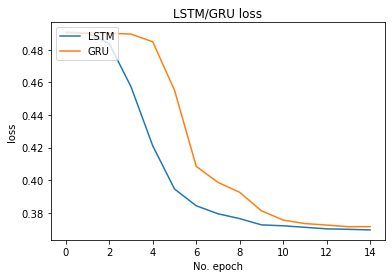

In [22]:
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.title('LSTM/GRU loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

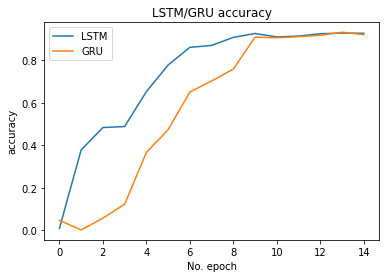

In [23]:
plt.plot(history_LSTM.history['accuracy'], label='LSTM')
plt.plot(history_GRU.history['accuracy'], label='GRU')
plt.title('LSTM/GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<span style="color:red">__TODO:__</span> Answer the question:

Which part of this task have you been struggling with most of the  time? Describe how you resolved it.

<span style="color:red">__SOLUTION:__</span>

Understand input shape of each layers and choice of loss function. By checking the keras documents.

<span style="color:red">__TODO:__</span> Answer the question:

Which loss function did you use? Why?

<span style="color:red">__SOLUTION:__</span>

Using MeanAbsoluteError. Since xor is a numerical funtion with output 0/1 and output is not categorical. So mean absolute error is more reasonable than mean square or categorical cross entropy.

## Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality (including different types of gates that constitute the cell).

You should refer to the materials on how the LSTM cell works  - with its cell states, activation functions and kernels. 
<br>Please see the course slides or the website https://colah.github.io/posts/2015-08-Understanding-LSTMs/.

<span style="color:red">TODO:</span> 
1. Complete the function **LSTM_step** in utils/xnor/LSTM_step.py;
2. Verify the function by running the provided code.
3. Use the same way (as described above) to build the model and to train it.


In [24]:
cell_inputs = np.ones((1,1))
cell_states = [0.2*np.ones((1,64)), np.zeros((1,64))]
kernel = 0.1*np.ones((1,256))
recurrent_kernel = 0.1*np.ones((64,256))
bias = np.zeros(256)

In [25]:
from utils.xnor.LSTM_step import LSTM_step

cell_inputs = np.ones((1,1))
cell_states = [0.2*np.ones((1,64)), np.zeros((1,64))]
kernel = 0.1*np.ones((1,256))
recurrent_kernel = 0.1*np.ones((64,256))
bias = np.zeros(256)

h , [h,c] = LSTM_step(cell_inputs, cell_states, kernel, recurrent_kernel, bias)
print('Simple verification:')
print('Is h correct?', np.isclose(h.numpy()[0][0],0.48484358))
print('Is c correct?', np.isclose(c.numpy()[0][0],0.70387213))

Simple verification:
Is h correct? True
Is c correct? True


In [26]:
in_data, out_data = create_xnor_dataset(1000)# create a dataset with a batch size of 1000

In [27]:
###################################################
# TODO: build a model with LSTM cell and train it.#
#                                                 #
###################################################



model_LSTM_2 = tf.keras.Sequential()
model_LSTM_2.add(LSTM(100))
model_LSTM_2.add(Dense(16,"tanh"))
model_LSTM_2.add(Dense(8))
model_LSTM_2.add(Activation('softmax'))


model_LSTM_2.compile(loss = "mae", # loss="categorical_crossentropy",
              optimizer=Adam(0.001),
              metrics=['accuracy']) 
history = model_LSTM_2.fit(x_train, y_train, batch_size=64, epochs=15) 

###################################################
# END TODO                                        #
###################################################

Epoch 1/15
16/16 [==============================] - 1s 3ms/step - loss: 0.4907 - accuracy: 0.0780
Epoch 2/15
16/16 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.4510
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.4800
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.5240
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.6070
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.7870
Epoch 7/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8120
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8630
Epoch 9/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.8980
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.9470
Epoch 11/15
16/16 [

#### Hint for building a model with LSTM cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

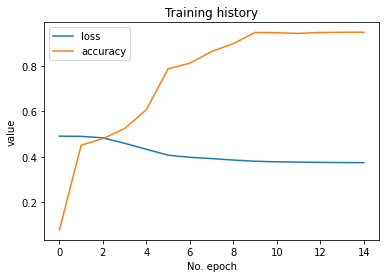

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()